In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 1️⃣ Load your current trained model (if you already saved it)
model = load_model('/content/drive/MyDrive/Colab Notebooks/waste_model_best.h5')

# 2️⃣ Recreate the base_model reference (MobileNetV2 backbone)
base_model = None
for layer in model.layers:
    if isinstance(layer, MobileNetV2):
        base_model = layer
        break

# If not found, rebuild from scratch with same input shape
if base_model is None:
    base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224,224,3))
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.3)(x)
    output = Dense(31, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=output)

# 3️⃣ Unfreeze more layers for deeper fine-tuning
for layer in base_model.layers[-70:]:  # last 70 layers
    layer.trainable = True

# 4️⃣ Compile with smaller LR
model.compile(optimizer=Adam(learning_rate=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5️⃣ Callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True),
    ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/waste_model_best.h5',
                    monitor='val_accuracy',
                    save_best_only=True)
]

# 6️⃣ Train again
third_train_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)

# 7️⃣ Evaluate
loss, acc = model.evaluate(val_ds)
print(f"✅ Final Validation Accuracy: {acc*100:.2f}%")

# 8️⃣ Save
model.save('/content/drive/MyDrive/Colab Notebooks/waste_model_final_90.h5')


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/content/drive/MyDrive/Colab Notebooks/waste_model_best.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model = load_model('/content/drive/MyDrive/Colab Notebooks/waste_model_finetuned.h5')

model.compile(optimizer=Adam(learning_rate=1e-6),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=4, restore_best_weights=True),
    ModelCheckpoint('/content/drive/MyDrive/Colab Notebooks/waste_model_best_90.h5',
                    monitor='val_accuracy', save_best_only=True)
]

third_train_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=15,
    callbacks=callbacks
)

loss, acc = model.evaluate(val_ds)
print(f"✅ Final Validation Accuracy after 3rd training: {acc*100:.2f}%")

model.save('/content/drive/MyDrive/Colab Notebooks/waste_model_final_90.h5')


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 23s/step - accuracy: 0.7498 - loss: 0.8187 

227/227 ━━━━━━━━━━━━━━━━━━━━ 7281s 32s/step - accuracy: 0.7498 - loss: 0.8188 - val_accuracy: 0.7569 - val_loss: 0.7669
Epoch 2/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7552 - loss: 0.8026

227/227 ━━━━━━━━━━━━━━━━━━━━ 623s 3s/step - accuracy: 0.7551 - loss: 0.8027 - val_accuracy: 0.7580 - val_loss: 0.7628
Epoch 3/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7499 - loss: 0.8267

227/227 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.7499 - loss: 0.8267 - val_accuracy: 0.7601 - val_loss: 0.7590
Epoch 4/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 640s 3s/step - accuracy: 0.7514 - loss: 0.8089 - val_accuracy: 0.7598 - val_loss: 0.7562
Epoch 5/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7476 - loss: 0.8203

227/227 ━━━━━━━━━━━━━━━━━━━━ 623s 3s/step - accuracy: 0.7476 - loss: 0.8202 - val_accuracy: 0.7616 - val_loss: 0.7537
Epoch 6/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7563 - loss: 0.7938

227/227 ━━━━━━━━━━━━━━━━━━━━ 625s 3s/step - accuracy: 0.7563 - loss: 0.7938 - val_accuracy: 0.7638 - val_loss: 0.7511
Epoch 7/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7554 - loss: 0.7771

227/227 ━━━━━━━━━━━━━━━━━━━━ 680s 3s/step - accuracy: 0.7554 - loss: 0.7772 - val_accuracy: 0.7649 - val_loss: 0.7491
Epoch 8/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 619s 3s/step - accuracy: 0.7510 - loss: 0.7956 - val_accuracy: 0.7645 - val_loss: 0.7469
Epoch 9/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 616s 3s/step - accuracy: 0.7516 - loss: 0.8137 - val_accuracy: 0.7645 - val_loss: 0.7446
Epoch 10/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 623s 3s/step - accuracy: 0.7522 - loss: 0.8054 - val_accuracy: 0.7641 - val_loss: 0.7422
Epoch 11/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7600 - loss: 0.7792

227/227 ━━━━━━━━━━━━━━━━━━━━ 627s 3s/step - accuracy: 0.7600 - loss: 0.7792 - val_accuracy: 0.7656 - val_loss: 0.7402
Epoch 12/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7586 - loss: 0.7846

227/227 ━━━━━━━━━━━━━━━━━━━━ 611s 3s/step - accuracy: 0.7586 - loss: 0.7846 - val_accuracy: 0.7659 - val_loss: 0.7377
Epoch 13/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7511 - loss: 0.7969

227/227 ━━━━━━━━━━━━━━━━━━━━ 614s 3s/step - accuracy: 0.7511 - loss: 0.7968 - val_accuracy: 0.7670 - val_loss: 0.7359
Epoch 14/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 606s 3s/step - accuracy: 0.7628 - loss: 0.7791 - val_accuracy: 0.7667 - val_loss: 0.7337
Epoch 15/15
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7712 - loss: 0.7603

227/227 ━━━━━━━━━━━━━━━━━━━━ 641s 3s/step - accuracy: 0.7712 - loss: 0.7603 - val_accuracy: 0.7674 - val_loss: 0.7317
87/87 ━━━━━━━━━━━━━━━━━━━━ 122s 1s/step - accuracy: 0.7673 - loss: 0.7447


✅ Final Validation Accuracy after 3rd training: 76.74%


In [1]:
# ✅ Step 1: Imports
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2

# ✅ Step 2: Data generators (train + test)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.25,
    height_shift_range=0.25,
    shear_range=0.2,
    zoom_range=0.3,
    brightness_range=[0.7, 1.3],
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_ds = test_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# ✅ Step 3: Load base model (MobileNetV2)
base_model = MobileNetV2(input_shape=(224, 224, 3),
                         include_top=False,
                         weights='imagenet')

# Freeze early layers
for layer in base_model.layers[:-120]:
    layer.trainable = False
for layer in base_model.layers[-120:]:
    layer.trainable = True

# ✅ Step 4: Add custom classification head
x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
output = layers.Dense(31, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

# ✅ Step 5: Compile
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Step 6: Add callbacks
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy',
    patience=3,
    factor=0.2,
    min_lr=1e-7,
    verbose=1
)

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    '/content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# ✅ Step 7: Train (25–30 epochs)
history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=30,
    callbacks=[lr_scheduler, early_stop, checkpoint]
)

# ✅ Step 8: Evaluate final model
loss, acc = model.evaluate(test_ds)
print(f"\n🎯 Final Test Accuracy: {acc*100:.2f}%")
print(f"📉 Final Test Loss: {loss:.4f}")


Found 7260 images belonging to 31 classes.
Found 2760 images belonging to 31 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.0435 - loss: 4.8563
Epoch 1: val_accuracy improved from -inf to 0.12572, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 2454s 11s/step - accuracy: 0.0436 - loss: 4.8551 - val_accuracy: 0.1257 - val_loss: 3.3573 - learning_rate: 1.0000e-05
Epoch 2/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1311 - loss: 3.7785
Epoch 2: val_accuracy improved from 0.12572 to 0.28949, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1158s 5s/step - accuracy: 0.1312 - loss: 3.7777 - val_accuracy: 0.2895 - val_loss: 2.6395 - learning_rate: 1.0000e-05
Epoch 3/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2299 - loss: 3.1635
Epoch 3: val_accuracy improved from 0.28949 to 0.41522, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1103s 5s/step - accuracy: 0.2300 - loss: 3.1630 - val_accuracy: 0.4152 - val_loss: 2.1138 - learning_rate: 1.0000e-05
Epoch 4/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3301 - loss: 2.6692
Epoch 4: val_accuracy improved from 0.41522 to 0.48732, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1086s 5s/step - accuracy: 0.3302 - loss: 2.6689 - val_accuracy: 0.4873 - val_loss: 1.7754 - learning_rate: 1.0000e-05
Epoch 5/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.3802 - loss: 2.4299
Epoch 5: val_accuracy improved from 0.48732 to 0.54529, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1070s 5s/step - accuracy: 0.3803 - loss: 2.4294 - val_accuracy: 0.5453 - val_loss: 1.5402 - learning_rate: 1.0000e-05
Epoch 6/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4411 - loss: 2.1287
Epoch 6: val_accuracy improved from 0.54529 to 0.59167, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1050s 5s/step - accuracy: 0.4411 - loss: 2.1286 - val_accuracy: 0.5917 - val_loss: 1.3755 - learning_rate: 1.0000e-05
Epoch 7/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.4681 - loss: 1.9795
Epoch 7: val_accuracy improved from 0.59167 to 0.61848, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1097s 5s/step - accuracy: 0.4682 - loss: 1.9793 - val_accuracy: 0.6185 - val_loss: 1.2502 - learning_rate: 1.0000e-05
Epoch 8/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5118 - loss: 1.7960
Epoch 8: val_accuracy improved from 0.61848 to 0.63986, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1059s 5s/step - accuracy: 0.5117 - loss: 1.7961 - val_accuracy: 0.6399 - val_loss: 1.1667 - learning_rate: 1.0000e-05
Epoch 9/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5343 - loss: 1.7095
Epoch 9: val_accuracy improved from 0.63986 to 0.65688, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1072s 5s/step - accuracy: 0.5342 - loss: 1.7096 - val_accuracy: 0.6569 - val_loss: 1.1013 - learning_rate: 1.0000e-05
Epoch 10/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5567 - loss: 1.5953
Epoch 10: val_accuracy improved from 0.65688 to 0.67971, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1076s 5s/step - accuracy: 0.5567 - loss: 1.5953 - val_accuracy: 0.6797 - val_loss: 1.0411 - learning_rate: 1.0000e-05
Epoch 11/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5666 - loss: 1.5504
Epoch 11: val_accuracy improved from 0.67971 to 0.69529, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1113s 5s/step - accuracy: 0.5666 - loss: 1.5502 - val_accuracy: 0.6953 - val_loss: 0.9885 - learning_rate: 1.0000e-05
Epoch 12/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5807 - loss: 1.4921
Epoch 12: val_accuracy improved from 0.69529 to 0.70580, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1097s 5s/step - accuracy: 0.5807 - loss: 1.4919 - val_accuracy: 0.7058 - val_loss: 0.9421 - learning_rate: 1.0000e-05
Epoch 13/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6054 - loss: 1.3734
Epoch 13: val_accuracy improved from 0.70580 to 0.72029, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1110s 5s/step - accuracy: 0.6054 - loss: 1.3734 - val_accuracy: 0.7203 - val_loss: 0.9042 - learning_rate: 1.0000e-05
Epoch 14/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6161 - loss: 1.3296
Epoch 14: val_accuracy improved from 0.72029 to 0.73043, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1077s 5s/step - accuracy: 0.6161 - loss: 1.3296 - val_accuracy: 0.7304 - val_loss: 0.8727 - learning_rate: 1.0000e-05
Epoch 15/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6279 - loss: 1.3147
Epoch 15: val_accuracy improved from 0.73043 to 0.73696, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1106s 5s/step - accuracy: 0.6279 - loss: 1.3146 - val_accuracy: 0.7370 - val_loss: 0.8444 - learning_rate: 1.0000e-05
Epoch 16/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6386 - loss: 1.2456
Epoch 16: val_accuracy improved from 0.73696 to 0.74710, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1074s 5s/step - accuracy: 0.6386 - loss: 1.2455 - val_accuracy: 0.7471 - val_loss: 0.8187 - learning_rate: 1.0000e-05
Epoch 17/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6497 - loss: 1.1890
Epoch 17: val_accuracy improved from 0.74710 to 0.75797, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1085s 5s/step - accuracy: 0.6497 - loss: 1.1890 - val_accuracy: 0.7580 - val_loss: 0.7965 - learning_rate: 1.0000e-05
Epoch 18/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6731 - loss: 1.1181
Epoch 18: val_accuracy improved from 0.75797 to 0.75906, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1119s 5s/step - accuracy: 0.6731 - loss: 1.1182 - val_accuracy: 0.7591 - val_loss: 0.7824 - learning_rate: 1.0000e-05
Epoch 19/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6765 - loss: 1.1098
Epoch 19: val_accuracy improved from 0.75906 to 0.76739, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1087s 5s/step - accuracy: 0.6765 - loss: 1.1099 - val_accuracy: 0.7674 - val_loss: 0.7645 - learning_rate: 1.0000e-05
Epoch 20/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6755 - loss: 1.0950
Epoch 20: val_accuracy improved from 0.76739 to 0.76848, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1100s 5s/step - accuracy: 0.6755 - loss: 1.0950 - val_accuracy: 0.7685 - val_loss: 0.7553 - learning_rate: 1.0000e-05
Epoch 21/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6971 - loss: 1.0520
Epoch 21: val_accuracy improved from 0.76848 to 0.77319, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1101s 5s/step - accuracy: 0.6971 - loss: 1.0520 - val_accuracy: 0.7732 - val_loss: 0.7422 - learning_rate: 1.0000e-05
Epoch 22/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6986 - loss: 1.0278
Epoch 22: val_accuracy improved from 0.77319 to 0.77899, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1072s 5s/step - accuracy: 0.6986 - loss: 1.0278 - val_accuracy: 0.7790 - val_loss: 0.7265 - learning_rate: 1.0000e-05
Epoch 23/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7051 - loss: 0.9963
Epoch 23: val_accuracy improved from 0.77899 to 0.77971, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1089s 5s/step - accuracy: 0.7051 - loss: 0.9963 - val_accuracy: 0.7797 - val_loss: 0.7156 - learning_rate: 1.0000e-05
Epoch 24/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7041 - loss: 0.9669
Epoch 24: val_accuracy improved from 0.77971 to 0.78297, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1102s 5s/step - accuracy: 0.7041 - loss: 0.9669 - val_accuracy: 0.7830 - val_loss: 0.7002 - learning_rate: 1.0000e-05
Epoch 25/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7295 - loss: 0.8789
Epoch 25: val_accuracy improved from 0.78297 to 0.78696, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1084s 5s/step - accuracy: 0.7295 - loss: 0.8790 - val_accuracy: 0.7870 - val_loss: 0.6934 - learning_rate: 1.0000e-05
Epoch 26/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7270 - loss: 0.8918
Epoch 26: val_accuracy improved from 0.78696 to 0.79094, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1117s 5s/step - accuracy: 0.7269 - loss: 0.8919 - val_accuracy: 0.7909 - val_loss: 0.6856 - learning_rate: 1.0000e-05
Epoch 27/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7261 - loss: 0.9145
Epoch 27: val_accuracy did not improve from 0.79094
227/227 ━━━━━━━━━━━━━━━━━━━━ 1112s 5s/step - accuracy: 0.7262 - loss: 0.9144 - val_accuracy: 0.7906 - val_loss: 0.6776 - learning_rate: 1.0000e-05
Epoch 28/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7417 - loss: 0.8399
Epoch 28: val_accuracy improved from 0.79094 to 0.79203, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1112s 5s/step - accuracy: 0.7417 - loss: 0.8400 - val_accuracy: 0.7920 - val_loss: 0.6711 - learning_rate: 1.0000e-05
Epoch 29/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7364 - loss: 0.8422
Epoch 29: val_accuracy improved from 0.79203 to 0.79384, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1089s 5s/step - accuracy: 0.7365 - loss: 0.8422 - val_accuracy: 0.7938 - val_loss: 0.6667 - learning_rate: 1.0000e-05
Epoch 30/30
227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.7402 - loss: 0.8655
Epoch 30: val_accuracy improved from 0.79384 to 0.79964, saving model to /content/drive/MyDrive/Colab Notebooks/waste_model_final_best.h5


227/227 ━━━━━━━━━━━━━━━━━━━━ 1108s 5s/step - accuracy: 0.7402 - loss: 0.8654 - val_accuracy: 0.7996 - val_loss: 0.6604 - learning_rate: 1.0000e-05
87/87 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.8027 - loss: 0.6398

🎯 Final Test Accuracy: 79.96%
📉 Final Test Loss: 0.6604


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_ds = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_ds = val_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)


Found 7260 images belonging to 31 classes.
Found 2760 images belonging to 31 classes.


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/train',
    image_size=(180, 180),
    batch_size=32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/test',
    image_size=(180, 180),
    batch_size=32
)



Found 7260 files belonging to 31 classes.
Found 2760 files belonging to 31 classes.


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(180, 180, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(train_ds.class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds, validation_data=test_ds, epochs=10)


Epoch 1/10


/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


227/227 ━━━━━━━━━━━━━━━━━━━━ 1698s 7s/step - accuracy: 0.0650 - loss: 3.3875 - val_accuracy: 0.1946 - val_loss: 2.8683
Epoch 2/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 580s 3s/step - accuracy: 0.2720 - loss: 2.6060 - val_accuracy: 0.3366 - val_loss: 2.4111
Epoch 3/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 582s 3s/step - accuracy: 0.4812 - loss: 1.8841 - val_accuracy: 0.4297 - val_loss: 2.3434
Epoch 4/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 627s 3s/step - accuracy: 0.6692 - loss: 1.1913 - val_accuracy: 0.4851 - val_loss: 2.5062
Epoch 5/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 619s 3s/step - accuracy: 0.7946 - loss: 0.7002 - val_accuracy: 0.4946 - val_loss: 2.9156
Epoch 6/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 599s 3s/step - accuracy: 0.8624 - loss: 0.4564 - val_accuracy: 0.4978 - val_loss: 3.4986
Epoch 7/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 601s 3s/step - accuracy: 0.9161 - loss: 0.3067 - val_accuracy: 0.5203 - val_loss: 3.3699
Epoch 8/10
227/227 ━━━━━━━━━━━━━━━━━━━━ 638s 3s/step - accuracy: 0.9305 - loss: 0.2382 - val_accuracy: 0.51

In [ ]:
model.save('/content/drive/MyDrive/waste_model.h5')


In [ ]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/waste_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Found 7260 files belonging to 31 classes.
✅ Predicted Class: plastic_food_containers


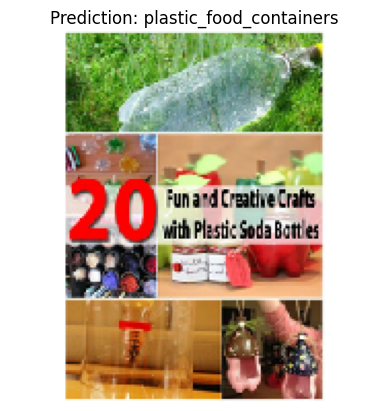

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# 1️⃣ Load the trained model
model = tf.keras.models.load_model('/content/drive/MyDrive/waste_model.h5')

# 2️⃣ Set the correct image path (pick one from your list)
img_path = '/content/drive/MyDrive/Colab Notebooks/waste_data_split/test/plastic_soda_bottles/Image_123.png'

# 3️⃣ Preprocess the image
img = image.load_img(img_path, target_size=(180, 180))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # normalize

# 4️⃣ Predict
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# 5️⃣ Get class names
train_ds = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/train',
    image_size=(180, 180),
    batch_size=32
)
class_names = train_ds.class_names

# 6️⃣ Display results
print("✅ Predicted Class:", class_names[predicted_class])
plt.imshow(img)
plt.title(f"Prediction: {class_names[predicted_class]}")
plt.axis('off')
plt.show()


In [ ]:
import random, os

test_folder = '/content/drive/MyDrive/Colab Notebooks/waste_data_split/test/plastic_soda_bottles'
random_image = random.choice(os.listdir(test_folder))
img_path = os.path.join(test_folder, random_image)
print("🖼️ Testing image:", img_path)


🖼️ Testing image: /content/drive/MyDrive/Colab Notebooks/waste_data_split/test/plastic_soda_bottles/Image_219.png


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Convert true labels and predictions
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred = np.argmax(model.predict(test_ds), axis=1)

# ✅ FIX: if y_true is already 1D, skip argmax
if len(y_true.shape) > 1:
    y_true = np.argmax(y_true, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("\n📊 Confusion Matrix:\n", cm)

# Classification report
print("\n🧾 Classification Report:\n", classification_report(y_true, y_pred, target_names=test_ds.class_names))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.colorbar()
plt.show()


87/87 ━━━━━━━━━━━━━━━━━━━━ 61s 697ms/step

📊 Confusion Matrix:
 [[ 2  3  4  3  3  6  2  0  2  5  1  2  1  2  1  5  5  7  2  3  2  5  3  4
   8  2  5  2  1  1]
 [ 1  3  2  5  2  2  4  0  4  3  1  0  1  4  3  7  8  3  1  1  4  2  4  4
  10  0  5  3  3  2]
 [ 3  5  3  1  2  3  4  3  2  5  2  1  2  1  1  6  5  0  2  4  1  6  5  6
   7  3  4  2  3  0]
 [ 6  5  3  2  4  1  3  2  4  6  3  3  2  2  3  6  7  3  0  2  2  6  3  1
   4  3  1  2  1  2]
 [ 5  1  7  3  1  2  6  1  4  4  2  0  1  2  5  5  7  1  2  4  0  4  4  8
   2  3  4  1  2  1]
 [ 3  4  5  4  1  1  4  2  3  1  0  0  1  6  3  7  5  5  5  3  4  1  6  4
   2  1  4  4  3  0]
 [ 4  3  0  2  2  3  5  2  1  1  3  1  3  5  5  5 10  4  3  2  3  3  4  6
   3  1  1  3  4  0]
 [ 5  5  3  3  4  3  4  3  3  4  3  2  1  5  5  3  5  1  3  4  1  1  5  6
   3  0  2  1  3  1]
 [ 0  1  5  5  3  5  4  2  3  4  1  1  4  4  6  4  5  1  4  1  4  3  4  6
   6  1  3  2  0  0]
 [ 3  4  3  4  5  4  6  4  2  3  2  0  1  6  2  2  7  4  0  2  3  4  5  0
   5  2

ValueError: Number of classes, 30, does not match size of target_names, 31. Try specifying the labels parameter

In [ ]:
print("Dataset classes:", len(test_ds.class_names))
print("Model output shape:", model.output_shape)


Dataset classes: 31
Model output shape: (None, 31)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2   # ✅ 20% of training data used as validation
)

# Training dataset (80%)
train_ds = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset='training'
)

# Validation dataset (20%)
val_ds = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset='validation'
)


Found 5820 images belonging to 31 classes.
Found 1440 images belonging to 31 classes.


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

# ========================
# 1️⃣ Data Preparation
# ========================
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% validation split
)

train_ds = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset='training'
)

val_ds = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode="categorical",
    subset='validation'
)

num_classes = train_ds.num_classes

# ========================
# 2️⃣ Build Model
# ========================
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze pretrained layers

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# ========================
# 3️⃣ Compile
# ========================
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# ========================
# 4️⃣ Callbacks
# ========================
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True)
]

# ========================
# 5️⃣ Train
# ========================
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25,
    callbacks=callbacks
)

# ========================
# 6️⃣ Evaluate
# ========================
loss, acc = model.evaluate(val_ds)
print(f"✅ Validation Accuracy: {acc*100:.2f}%")


Found 5820 images belonging to 31 classes.
Found 1440 images belonging to 31 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 2753s 15s/step - accuracy: 0.0658 - loss: 3.5919 - val_accuracy: 0.3250 - val_loss: 2.7701
Epoch 2/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 413s 2s/step - accuracy: 0.2334 - loss: 2.8009 - val_accuracy: 0.4965 - val_loss: 2.1095
Epoch 3/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 411s 2s/step - accuracy: 0.3824 - loss: 2.2678 - val_accuracy: 0.5618 - val_loss: 1.6859
Epoch 4/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 416s 2s/step - accuracy: 0.4527 - loss: 1.9571 - val_accuracy: 0.6118 - val_loss: 1.4379
Epoch 5/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 452s 2s/step - accuracy: 0.5113 - loss: 1.7229 - val_accuracy: 0.6208 - val_loss: 1.3179
Epoch 6/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 402s 2s/step - accuracy: 0.5522 - loss: 1.5595 - val_accuracy: 0.6486 - val_loss: 1.1889
Epoch 7/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 410s 2s/step - accuracy: 0.5662 - loss: 1.4726 - val_accuracy: 0.6681 - val_loss: 1.1314
Epoch 8/25
182/182 ━━━━━━━━━━━━━━━━━━━━ 464s 3s/step - accuracy: 0.5911 - loss: 1.3748 - val_ac

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # 20% of training data becomes validation
)

train_ds = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_ds = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/waste_data_split/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)



Found 5820 images belonging to 31 classes.
Found 1440 images belonging to 31 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# 1️⃣ Load MobileNetV2 base (without top layers)
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # freeze base for now

# 2️⃣ Add custom classification layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(31, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)
model.compile(optimizer=Adam(learning_rate=1e-4),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 3️⃣ Train the top layers first
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# 4️⃣ Unfreeze the last 30 layers for fine-tuning
for layer in base_model.layers[-30:]:
    layer.trainable = True

model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

fine_tune_history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)

# 5️⃣ Save the fine-tuned model
model.save('/content/drive/MyDrive/Colab Notebooks/waste_model_finetuned.h5')


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 3703s 20s/step - accuracy: 0.0472 - loss: 3.8209 - val_accuracy: 0.2174 - val_loss: 2.8642
Epoch 2/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 369s 2s/step - accuracy: 0.1966 - loss: 2.8728 - val_accuracy: 0.4479 - val_loss: 2.2269
Epoch 3/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 382s 2s/step - accuracy: 0.3412 - loss: 2.3327 - val_accuracy: 0.5257 - val_loss: 1.8792
Epoch 4/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 379s 2s/step - accuracy: 0.4520 - loss: 2.0161 - val_accuracy: 0.5757 - val_loss: 1.6378
Epoch 5/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 373s 2s/step - accuracy: 0.5041 - loss: 1.7676 - val_accuracy: 0.5951 - val_loss: 1.4947
Epoch 6/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 393s 2s/step - accuracy: 0.5268 - loss: 1.6318 - val_accuracy: 0.6292 - val_loss: 1.3618
Epoch 7/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 381s 2s/step - accuracy: 0.5866 - loss: 1.4959 - val_accuracy: 0.6389 - val_loss: 1.2949
Epoch 8/10
182/182 ━━━━━━━━━━━━━━━━━━━━ 376s 2s/step - accuracy: 0.5924 - loss: 1.4294 - val_ac

In [ ]:
!ls '/content/drive/MyDrive/Colab Notebooks/waste_data_split/test/plastic_soda_bottles'



Image_101.png  Image_133.png  Image_195.png  Image_236.png  Image_54.png
Image_106.png  Image_140.png  Image_198.png  Image_238.png  Image_55.png
Image_107.png  Image_143.png  Image_1.png    Image_240.png  Image_64.png
Image_109.png  Image_145.png  Image_201.png  Image_241.png  Image_67.png
Image_110.png  Image_149.png  Image_202.png  Image_248.png  Image_6.png
Image_112.png  Image_156.png  Image_207.png  Image_249.png  Image_70.png
Image_114.png  Image_157.png  Image_208.png  Image_25.png   Image_72.png
Image_115.png  Image_158.png  Image_212.png  Image_26.png   Image_73.png
Image_117.png  Image_159.png  Image_214.png  Image_27.png   Image_81.png
Image_119.png  Image_160.png  Image_217.png  Image_28.png   Image_85.png
Image_11.png   Image_161.png  Image_219.png  Image_2.png    Image_86.png
Image_120.png  Image_165.png  Image_21.png   Image_31.png   Image_88.png
Image_122.png  Image_166.png  Image_220.png  Image_38.png   Image_89.png
Image_123.png  Image_167.png  Image_221.png  Image_3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Copy back your saved dataset to Colab
!cp -r "/content/drive/MyDrive/waste_data_split" /content/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
cp: cannot stat '/content/drive/MyDrive/waste_data_split': No such file or directory


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving kaggle.json to kaggle.json


In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets list -s waste


ref                                                              title                                                     size  lastUpdated                 downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
techsash/waste-classification-data                               Waste Classification data                            447914276  2019-06-16 03:24:52.733000          49971        537  0.875            
joebeachcapital/food-waste                                       Food Waste                                                7157  2023-08-03 01:36:24.530000           7391         88  1.0              
alistairking/recyclable-and-household-waste-classification       Recyclable and Household Waste Classification        964682710  2024-05-18 19:06:35.757000          11563        162  1.0          

In [ ]:
!kaggle datasets download -d alistairking/recyclable-and-household-waste-classification
!unzip recyclable-and-household-waste-classification.zip -d waste_dataset


Streaming output truncated to the last 5000 lines.
  inflating: waste_dataset/images/images/plastic_shopping_bags/default/Image_1.png  
  inflating: waste_dataset/images/images/plastic_shopping_bags/default/Image_10.png  
  inflating: waste_dataset/images/images/plastic_shopping_bags/default/Image_100.png  
  inflating: waste_dataset/images/images/plastic_shopping_bags/default/Image_101.png  
  inflating: waste_dataset/images/images/plastic_shopping_bags/default/Image_102.png  
  inflating: waste_dataset/images/images/plastic_shopping_bags/default/Image_103.png  
  inflating: waste_dataset/images/images/plastic_shopping_bags/default/Image_104.png  
  inflating: waste_dataset/images/images/plastic_shopping_bags/default/Image_105.png  
  inflating: waste_dataset/images/images/plastic_shopping_bags/default/Image_106.png  
  inflating: waste_dataset/images/images/plastic_shopping_bags/default/Image_107.png  
  inflating: waste_dataset/images/images/plastic_shopping_bags/default/Image_108.p

In [ ]:
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Path where your dataset was unzipped
data_dir = "/content/waste_dataset/images/images"


# List folders (should show 'Recyclable' and 'Household' or similar)
print("Folders:", os.listdir(data_dir))

# Count number of images per class
for folder in os.listdir(data_dir):
    folder_path = os.path.join(data_dir, folder)
    if os.path.isdir(folder_path):
        print(f"{folder}: {len(os.listdir(folder_path))} images")


Folders: ['aluminum_soda_cans', 'plastic_shopping_bags', 'cardboard_boxes', 'plastic_food_containers', 'plastic_soda_bottles', 'styrofoam_cups', 'magazines', 'aerosol_cans', 'aluminum_food_cans', 'styrofoam_food_containers', 'plastic_detergent_bottles', 'newspaper', 'steel_food_cans', 'plastic_water_bottles', 'glass_cosmetic_containers', 'plastic_straws', 'tea_bags', 'plastic_cup_lids', 'eggshells', 'clothing', 'glass_food_jars', 'shoes', 'disposable_plastic_cutlery', 'cardboard_packaging', 'plastic_trash_bags', 'paper_cups', 'glass_beverage_bottles', 'food_waste', 'coffee_grounds', 'office_paper']
aluminum_soda_cans: 2 images
plastic_shopping_bags: 2 images
cardboard_boxes: 2 images
plastic_food_containers: 2 images
plastic_soda_bottles: 2 images
styrofoam_cups: 2 images
magazines: 2 images
aerosol_cans: 2 images
aluminum_food_cans: 2 images
styrofoam_food_containers: 2 images
plastic_detergent_bottles: 2 images
newspaper: 2 images
steel_food_cans: 2 images
plastic_water_bottles: 2 im

In [ ]:
!unzip recyclable-and-household-waste-classification.zip -d /content/full_dataset
!find /content/full_dataset -type d -maxdepth 3


Streaming output truncated to the last 5000 lines.
  inflating: /content/full_dataset/images/images/plastic_shopping_bags/default/Image_13.png  
  inflating: /content/full_dataset/images/images/plastic_shopping_bags/default/Image_130.png  
  inflating: /content/full_dataset/images/images/plastic_shopping_bags/default/Image_131.png  
  inflating: /content/full_dataset/images/images/plastic_shopping_bags/default/Image_132.png  
  inflating: /content/full_dataset/images/images/plastic_shopping_bags/default/Image_133.png  
  inflating: /content/full_dataset/images/images/plastic_shopping_bags/default/Image_134.png  
  inflating: /content/full_dataset/images/images/plastic_shopping_bags/default/Image_135.png  
  inflating: /content/full_dataset/images/images/plastic_shopping_bags/default/Image_136.png  
  inflating: /content/full_dataset/images/images/plastic_shopping_bags/default/Image_137.png  
  inflating: /content/full_dataset/images/images/plastic_shopping_bags/default/Image_138.png  


In [ ]:
import os

data_dir = "/content/full_dataset/images"

count = 0
for root, dirs, files in os.walk(data_dir):
    count += len([f for f in files if f.lower().endswith(('.jpg', '.png', '.jpeg'))])

print("Total images found:", count)


Total images found: 15000


In [ ]:
import os
from sklearn.model_selection import train_test_split
import shutil

base_dir = '/content/waste_data_split'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

classes = os.listdir(data_dir)
print("Classes:", classes)

for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        images = os.listdir(cls_path)
        train_imgs, test_imgs = train_test_split(images, test_size=0.2, random_state=42)

        os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
        os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

        for img in train_imgs:
            shutil.copy(os.path.join(cls_path, img), os.path.join(train_dir, cls, img))
        for img in test_imgs:
            shutil.copy(os.path.join(cls_path, img), os.path.join(test_dir, cls, img))

print("✅ Dataset successfully split into train and test folders!")


Classes: ['images']


IsADirectoryError: [Errno 21] Is a directory: '/content/full_dataset/images/images/coffee_grounds'

In [ ]:
!find /content/full_dataset -type d -maxdepth 4


find: warning: you have specified the global option -maxdepth after the argument -type, but global options are not positional, i.e., -maxdepth affects tests specified before it as well as those specified after it.  Please specify global options before other arguments.
/content/full_dataset
/content/full_dataset/images
/content/full_dataset/images/images
/content/full_dataset/images/images/aluminum_soda_cans
/content/full_dataset/images/images/aluminum_soda_cans/real_world
/content/full_dataset/images/images/aluminum_soda_cans/default
/content/full_dataset/images/images/plastic_shopping_bags
/content/full_dataset/images/images/plastic_shopping_bags/real_world
/content/full_dataset/images/images/plastic_shopping_bags/default
/content/full_dataset/images/images/cardboard_boxes
/content/full_dataset/images/images/cardboard_boxes/real_world
/content/full_dataset/images/images/cardboard_boxes/default
/content/full_dataset/images/images/plastic_food_containers
/content/full_dataset/images/ima

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split
import tensorflow as tf

# Correct base dataset path
data_dir = "/content/full_dataset/images/images"

# Split directories
base_dir = '/content/waste_data_split'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# All class folders
classes = os.listdir(data_dir)
print("Classes found:", classes)

for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        # Collect images from both 'real_world' and 'default' subfolders
        all_images = []
        for subfolder in ['real_world', 'default']:
            sub_path = os.path.join(cls_path, subfolder)
            if os.path.exists(sub_path):
                all_images.extend([os.path.join(sub_path, img) for img in os.listdir(sub_path)])

        # Split into train/test
        train_imgs, test_imgs = train_test_split(all_images, test_size=0.2, random_state=42)

        # Create destination folders
        os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
        os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

        # Copy images
        for img in train_imgs:
            shutil.copy(img, os.path.join(train_dir, cls, os.path.basename(img)))
        for img in test_imgs:
            shutil.copy(img, os.path.join(test_dir, cls, os.path.basename(img)))

print("✅ Dataset successfully combined and split into train/test sets!")

# 🔹 Now create TensorFlow datasets AFTER copying
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=(180, 180), batch_size=32)
test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(180, 180), batch_size=32)


Classes found: ['aluminum_soda_cans', 'plastic_shopping_bags', 'cardboard_boxes', 'plastic_food_containers', 'plastic_soda_bottles', 'styrofoam_cups', 'magazines', 'aerosol_cans', 'aluminum_food_cans', 'styrofoam_food_containers', 'plastic_detergent_bottles', 'newspaper', 'steel_food_cans', 'plastic_water_bottles', 'glass_cosmetic_containers', 'plastic_straws', 'tea_bags', 'plastic_cup_lids', 'eggshells', 'clothing', 'glass_food_jars', 'shoes', 'disposable_plastic_cutlery', 'cardboard_packaging', 'plastic_trash_bags', 'paper_cups', 'glass_beverage_bottles', 'food_waste', 'coffee_grounds', 'office_paper']
✅ Dataset successfully combined and split into train/test sets!
Found 7260 files belonging to 31 classes.
Found 2760 files belonging to 31 classes.


In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Original dataset
data_dir = "/content/full_dataset/images/images"

# Drive save path
drive_base_dir = "/content/drive/MyDrive/waste_data_split"
train_dir = os.path.join(drive_base_dir, 'train')
test_dir = os.path.join(drive_base_dir, 'test')

# Make sure folders exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Rebuild test split from source
classes = os.listdir(data_dir)
print("Rebuilding test split for classes:", len(classes))

for cls in classes:
    cls_path = os.path.join(data_dir, cls)
    if os.path.isdir(cls_path):
        # Collect all images from both subfolders
        all_images = []
        for sub in ["real_world", "default"]:
            sub_path = os.path.join(cls_path, sub)
            if os.path.exists(sub_path):
                all_images.extend([os.path.join(sub_path, img) for img in os.listdir(sub_path)])

        # Skip empty classes
        if len(all_images) == 0:
            continue

        # Split (20% test)
        _, test_imgs = train_test_split(all_images, test_size=0.2, random_state=42)

        # Create test folder in Drive
        os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

        # Copy test images
        for img in test_imgs:
            shutil.copy(img, os.path.join(test_dir, cls, os.path.basename(img)))

print("\n✅ Test dataset successfully rebuilt and saved to Google Drive!")


Rebuilding test split for classes: 30

✅ Test dataset successfully rebuilt and saved to Google Drive!


In [ ]:
!ls /content/drive/MyDrive/waste_data_split


test  train


In [ ]:
import os

data_dir = "/content/waste_dataset/images"
files = os.listdir(data_dir)

print("Total files:", len(files))
print("First 10 files:", files[:10])


Total files: 1
First 10 files: ['images']
